# **Foundations of Deep Learning**<br/>
**Master's Degree in Data Science (A.Y. 2023/2024)**<br/>
**University of Milano - Bicocca**<br/>

Francesca Del Giudice,
Gaia Righetti

# **IMAGE CLASSIFICATION**

In [ ]:
!pip install tensorflow==2.16.0rc0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 73.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 50.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 33.7 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

In [ ]:
!PYTHONHASHSEED=0
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import zipfile
from shutil import copyfile
from time import time
import numpy as np
import random as python_random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
np.random.seed(0)
python_random.seed(0)
tf.random.set_seed(0)

## **Step 1:**

### Upload the original dataset with 12 classes

We have manually removed erroneous or duplicate images from each class in the dataset.

In [ ]:
# Link Google Drive account
from google.colab import drive
drive.mount('/content/gdrive')
copyfile('gdrive/My Drive/pasta_12.zip', 'pasta_12.zip')
zip = zipfile.ZipFile('pasta_12.zip')
zip.extractall()
zip.close()

Mounted at /content/gdrive


In [ ]:
dataset_dir = 'simple_images/'

In [ ]:
train_dataset = keras.utils.image_dataset_from_directory(dataset_dir,
                                                         image_size=(320,320),
                                                            batch_size=32,
                                                            label_mode='categorical',
                                                            subset='training',
                                                            validation_split = 0.3,
                                                            shuffle=True,
                                                            seed=1)

val_dataset = keras.utils.image_dataset_from_directory(dataset_dir,
                                                       image_size=(320,320),
                                                            batch_size=32,
                                                            label_mode='categorical',
                                                            subset='validation',
                                                            validation_split = 0.3,
                                                            shuffle=True,
                                                            seed=1)

NameError: name 'dataset_dir' is not defined

**Note**



The images were loaded from the directory specified by *dataset_dir* with a target size of 320x320 pixels.


Each batch contains 32 images, a typical batch size that balances computational efficiency and model generalization.

Labels are represented in categorical format, suitable for multi-class classification tasks like ours where each image belongs to one specific category.

We have created two image datasets: one for training and one for validation.
This separation allows us to train the model on one set of data and evaluate its performance on another, ensuring unbiased assessment.
For the training dataset, we used a subset of 70% of the data, while for the validation dataset the remaining 30%.

Both datasets were shuffled to ensure that the model doesn't learn the order of the data, which could lead to biased training.
A seed value of 1 was used for reproducibility, ensuring consistent results when rerunning the code.


## Defining a model from scratch

In [ ]:
num_classes = 12

**Model M12.1**

In [ ]:
# Architecture definition M1
inputs = keras.Input((320,320,3))

x = inputs
x = keras.layers.Conv2D(32, 3, padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)

x = keras.layers.Conv2D(64, 3, padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)

x = keras.layers.Dropout(0.2)(x)

x = keras.layers.GlobalMaxPooling2D()(x)

outputs = keras.layers.Dense(num_classes, activation="softmax")(x)
net = keras.Model(inputs, outputs)

In [ ]:
# Compile the model for training M1
net.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
            metrics=['accuracy'])

In [ ]:
# Model training M1
history = net.fit(train_dataset,
          epochs=60,
          validation_data=val_dataset);

Epoch 1/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.1569 - loss: 2.5200 - val_accuracy: 0.1301 - val_loss: 3.0879
Epoch 2/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.1802 - loss: 2.4471 - val_accuracy: 0.0569 - val_loss: 3.2988
Epoch 3/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.1854 - loss: 2.3939 - val_accuracy: 0.0894 - val_loss: 2.8331
Epoch 4/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.2298 - loss: 2.4670 - val_accuracy: 0.0976 - val_loss: 2.6780
Epoch 5/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.2444 - loss: 2.4867 - val_accuracy: 0.1138 - val_loss: 2.7597
Epoch 6/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.2550 - loss: 2.2690 - val_accuracy: 0.0894 - val_loss: 2.7915
Epoch 7/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - accuracy: 0.2406 - loss: 2.3733 - val_accuracy: 0.0976 - val_loss: 2.9434
Epoch 8/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - accuracy: 0.2364 - loss: 2.2612 - val_accuracy: 0.0976 -

**Note**

A convolutional neural network (CNN) model architecture, denoted as M1, is defined using the Keras library with a TensorFlow backend.
* The model begins by defining the input shape for the images as 320x320 pixels with three color channels.
* Subsequently, convolutional layers with 32 and 64 filters, respectively, are added to extract features from the input images.
* Batch normalization is applied after each convolutional layer to stabilize and accelerate the training process.
* ReLU activation functions introduce non-linearity to the model, facilitating its ability to learn complex patterns.
* Max pooling layers with a pool size of 3x3 and strides of 3x3 are employed to downsample the feature maps, reducing computational complexity and extracting the most relevant information.
* Dropout regularization with a rate of 0.2 is applied to mitigate overfitting by randomly dropping 20% of the neurons during training.
* Global max pooling is utilized to reduce the spatial dimensions of the feature maps to a single vector, preparing them for the final classification layer.
* The output layer consists of a dense layer with a softmax activation function, enabling multi-class classification by predicting the probability distribution over the different pasta classes.

Finally, the model is compiled for training using categorical cross-entropy as the loss function, RMSprop optimizer with a learning rate of 0.001, and accuracy as the evaluation metric.

The model is then trained for 60 epochs using the provided training dataset, with validation data used for evaluating the model's performance after each epoch.

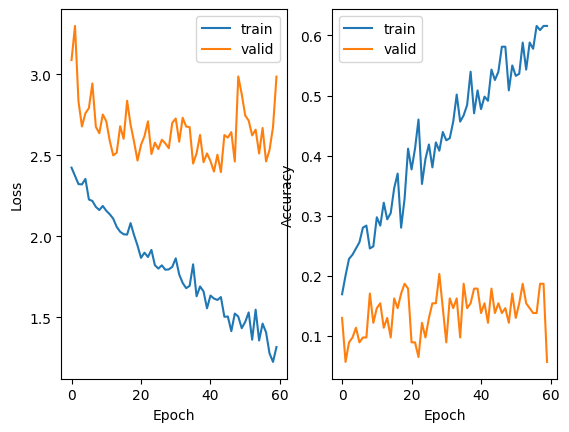

In [ ]:
# Visualization of the learning curves

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'valid'])

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'valid'])

From the graph, it's evident that there's significant overfitting occurring. This means that while the model performs admirably on the training data, it struggles to generalize its performance to the validation set. In other words, it's overly tailored to the nuances and intricacies of the training data, failing to capture the broader patterns and characteristics necessary for effective performance on unseen data. This discrepancy between the model's performance on training and validation data suggests that it may be too complex or that there's insufficient regularization to prevent it from memorizing the training data rather than learning to generalize.

**Model M12.2**

In [ ]:
# Architecture definition M2
inputs = keras.Input((320,320,3))

x = inputs
x = keras.layers.Conv2D(32, 3, padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)

x = keras.layers.Conv2D(64, 3, padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)

x = keras.layers.Conv2D(128, 3, padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)

x = keras.layers.GlobalMaxPooling2D()(x)

x = keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)

x = keras.layers.Dropout(0.2)(x)

outputs = keras.layers.Dense(num_classes, activation="softmax", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
net = keras.Model(inputs, outputs)

In [ ]:
# Compile the model for training M2
net.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
            metrics=['accuracy'])

In [ ]:
# Model training M2
history = net.fit(train_dataset,
          epochs=60,
          validation_data=val_dataset);

Epoch 1/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 907ms/step - accuracy: 0.0764 - loss: 3.8595 - val_accuracy: 0.0894 - val_loss: 6.0745
Epoch 2/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - accuracy: 0.1163 - loss: 3.1159 - val_accuracy: 0.0976 - val_loss: 5.4725
Epoch 3/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.0978 - loss: 2.8518 - val_accuracy: 0.0894 - val_loss: 4.6239
Epoch 4/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.1511 - loss: 2.7611 - val_accuracy: 0.1301 - val_loss: 3.3997
Epoch 5/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.1730 - loss: 2.5933 - val_accuracy: 0.0976 - val_loss: 3.2171
Epoch 6/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.2001 - loss: 2.5797 - val_accuracy: 0.1138 - val_loss: 3.2764
Epoch 7/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.1663 - loss: 2.4649 - val_accuracy: 0.1138 - val_loss: 3.0302
Epoch 8/60
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.2159 - loss: 2.4000 - val_accuracy: 0.0813 

**Note**

Similar to the previous model, M2 consists of convolutional layers, batch normalization, activation functions, pooling layers, and regularization techniques. The difference lies in the specific configuration of the layers and the inclusion of L2 regularization, which penalizes large weight values to prevent overfitting. Additionally, this model has a different input shape and number of units in the dense layer compared to the previous one. Finally, the model is compiled and trained on the provided datasets for 60 epochs.

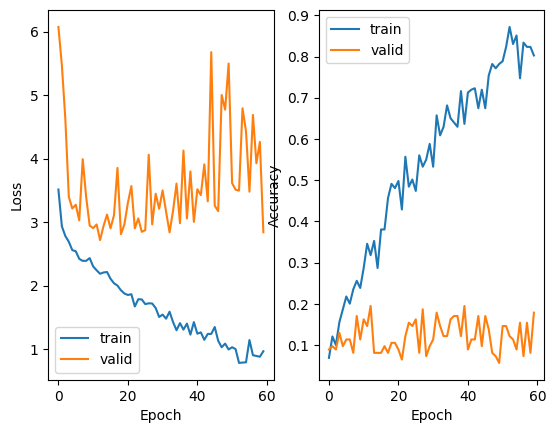

In [ ]:
# Visualization of the learning curves

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'valid'])

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'valid'])



Despite incorporating layers to improve regularization and generalization, the model still exhibits significant overfitting. The accuracy graph reveals that while the model performs well on the training data, it struggles with the validation data. This discrepancy indicates that the model is fitting the training data too closely, capturing noise and details specific to the training set, which hinders its performance on new, unseen data.

## **Step 2:**

### Upload the original dataset with 10 classes

We have manually removed two out of the twelve classes from our dataset. This decision was made due to the potential for misclassification caused by their similarity with two other classes. Specifically, we excluded the classes *fettuccine* and *linguine* to avoid confusion with *tagliatelle* and *spaghetti* respectively. By removing these classes, we aim to enhance the accuracy and reliability of our classification model by minimizing the risk of confusion between visually similar pasta types.

In [ ]:
copyfile('gdrive/My Drive/pasta10.zip', 'pasta10.zip')
zip = zipfile.ZipFile('pasta10.zip')
zip.extractall()
zip.close()

In [ ]:
dataset_dir = 'simple_images copia/'

In [ ]:
train_dataset = keras.utils.image_dataset_from_directory(dataset_dir,
                                                         image_size=(320,320),
                                                            batch_size=32,
                                                            label_mode='categorical',
                                                            subset='training',
                                                            validation_split = 0.3,
                                                            shuffle=True,
                                                            seed=1)

val_dataset = keras.utils.image_dataset_from_directory(dataset_dir,
                                                       image_size=(320,320),
                                                            batch_size=32,
                                                            label_mode='categorical',
                                                            subset='validation',
                                                            validation_split = 0.3,
                                                            shuffle=True,
                                                            seed=1)

Found 345 files belonging to 10 classes.
Using 242 files for training.


**Note**

We have carried out the same operations as in step 1

Let's retrain the previous models, M1 and M2, using this updated dataset.

In [ ]:
num_classes = 10

**Model M10.1**

In [ ]:
# Architecture definition M1
inputs = keras.Input((320,320,3))

x = inputs
x = keras.layers.Conv2D(32, 3, padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)

x = keras.layers.Conv2D(64, 3, padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)

x = keras.layers.Dropout(0.2)(x)

x = keras.layers.GlobalMaxPooling2D()(x)

outputs = keras.layers.Dense(num_classes, activation="softmax")(x)
net = keras.Model(inputs, outputs)

In [ ]:
# Compile the model for training M1
net.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
            metrics=['accuracy'])

In [ ]:
# Model training M1
history = net.fit(train_dataset,
          epochs=60,
          validation_data=val_dataset);

Epoch 1/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 846ms/step - accuracy: 0.0974 - loss: 5.8436 - val_accuracy: 0.0971 - val_loss: 9.9760
Epoch 2/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.1578 - loss: 2.8066 - val_accuracy: 0.1068 - val_loss: 7.7688
Epoch 3/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.1697 - loss: 2.6548 - val_accuracy: 0.1068 - val_loss: 5.9085
Epoch 4/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.1484 - loss: 2.3933 - val_accuracy: 0.1068 - val_loss: 6.2593
Epoch 5/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.2501 - loss: 2.2493 - val_accuracy: 0.0971 - val_loss: 5.3729
Epoch 6/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.2540 - loss: 2.0802 - val_accuracy: 0.0874 - val_loss: 4.6322
Epoch 7/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.2384 - loss: 2.1288 - val_accuracy: 0.0874 - val_loss: 3.9889
Epoch 8/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.2916 - loss: 1.9487 - val_accuracy: 0.1068 - val_loss: 4.06

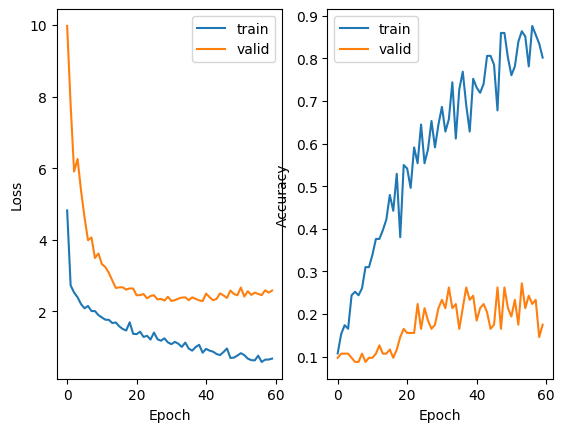

In [ ]:
# Visualization of the learning curves

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'valid'])

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'valid'])

**Model M10.2**

In [ ]:
# Architecture definition M2
inputs = keras.Input((320,320,3))

x = inputs
x = keras.layers.Conv2D(32, 3, padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)

x = keras.layers.Conv2D(64, 3, padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)

x = keras.layers.Conv2D(128, 3, padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)

x = keras.layers.GlobalMaxPooling2D()(x)

x = keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)

x = keras.layers.Dropout(0.2)(x)

outputs = keras.layers.Dense(num_classes, activation="softmax", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
net = keras.Model(inputs, outputs)

In [ ]:
# Compile the model for training M2
net.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
            metrics=['accuracy'])

In [ ]:
# Model training M2
history = net.fit(train_dataset,
          epochs=60,
          validation_data=val_dataset);

NameError: name 'net' is not defined

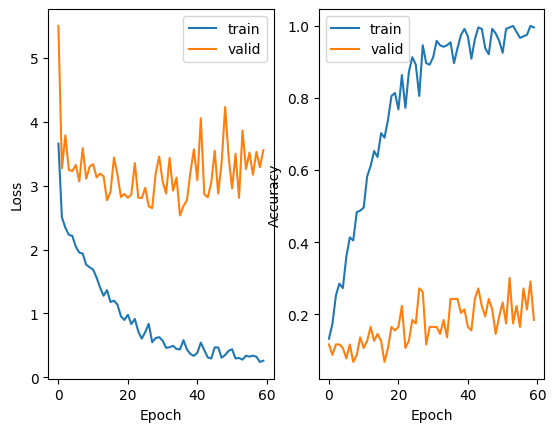

In [ ]:
# Visualization of the learning curves

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'valid'])

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'valid'])

The results indicate that despite the removal of critical classes, the model still performs poorly on the validation data. This could imply that the dataset size is too limited to achieve satisfactory performance on the test set. Therefore, we will augment the dataset with additional images and redefine our objective.

## **Step 3:**

### Enriched and Integrated dataset with 4 classes

The dataset was integrated and enriched to obtain a final dataset made of 4 classes.

In [ ]:
copyfile('gdrive/My Drive/pasta_4.zip', 'pasta_4.zip')
zip = zipfile.ZipFile('pasta_4.zip')
zip.extractall()
zip.close()

In [ ]:
dataset_dir = 'simple_images_4/'
num_classes=4

In [ ]:
train_dataset = keras.utils.image_dataset_from_directory(dataset_dir,
                                                            batch_size=32,
                                                            label_mode='categorical',
                                                            subset='training',
                                                            validation_split = 0.3,
                                                            shuffle=True,
                                                            seed=1)

val_dataset = keras.utils.image_dataset_from_directory(dataset_dir,
                                                            batch_size=32,
                                                            label_mode='categorical',
                                                            subset='validation',
                                                            validation_split = 0.3,
                                                            shuffle=True,
                                                            seed=1)

Found 974 files belonging to 4 classes.
Using 682 files for training.
Found 974 files belonging to 4 classes.
Using 292 files for validation.


**Note**

In this updated dataset, the images do not have a consistent size. Therefore, we do not specify the image size during the splitting process into training and validation datasets.

## **Data Analysis**
The following code cell allows to plot the class distribution of the dataset.


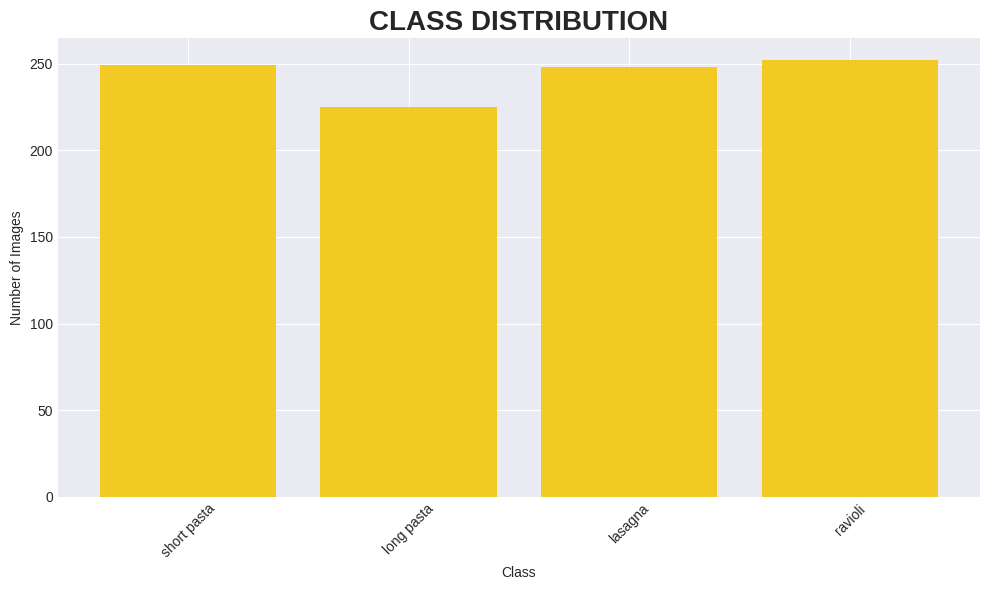

In [ ]:
import os
import matplotlib.pyplot as plt

def plot_class_distribution(dataset_dir):
    class_counts = {class_name: len(os.listdir(os.path.join(dataset_dir, class_name)))
                    for class_name in os.listdir(dataset_dir)
                    if os.path.isdir(os.path.join(dataset_dir, class_name))}

    plt.figure(figsize=(10, 6))
    plt.bar(class_counts.keys(), class_counts.values(), color='#f3ca24')
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.title('CLASS DISTRIBUTION', fontsize=20, weight='bold')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_class_distribution(dataset_dir)

The dataset consists of four classes, each with approximately 250 images. This balanced distribution ensures that the model will not be biased towards any particular class.

As a result, the model is expected to treat each class equally during training and evaluation, leading to fairer and more accurate predictions across all categories.

To see some random images belonging to each of the 4 classes, the following code is used:

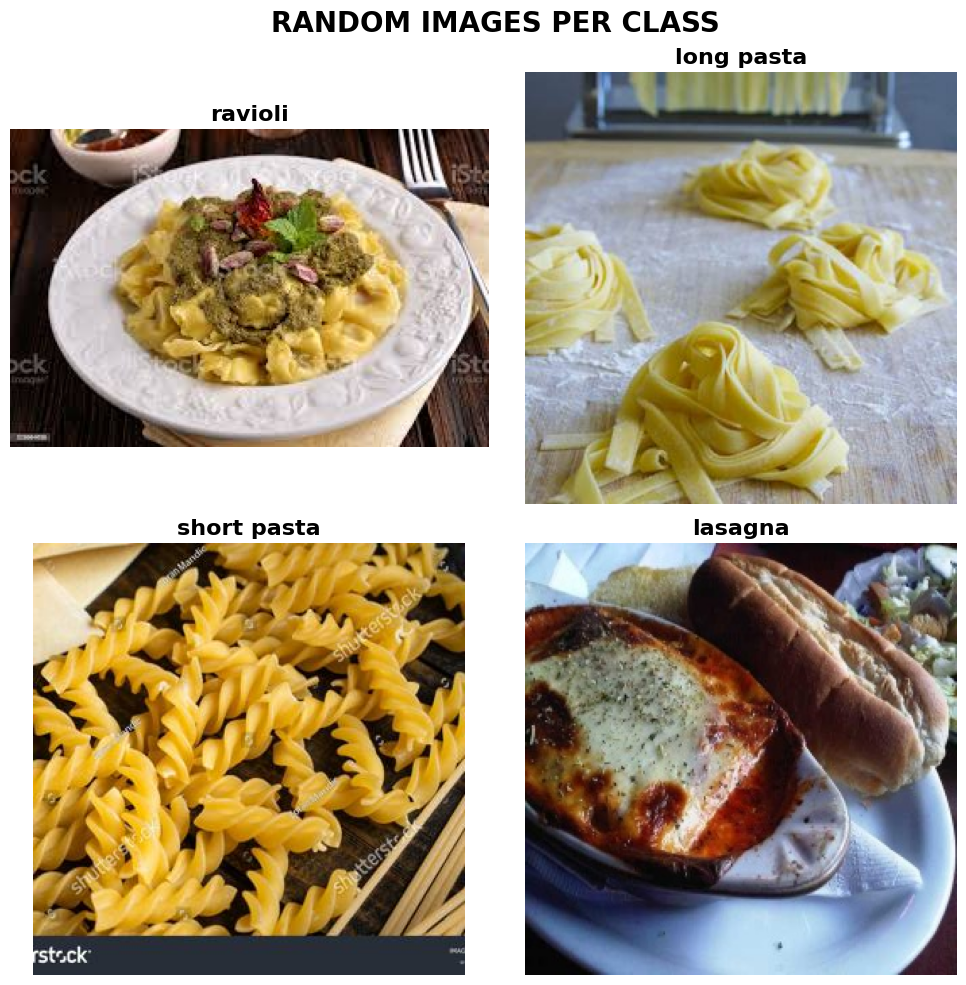

In [ ]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

def display_random_images(dataset_dir):
    classes = [d for d in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, d))]

    plt.figure(figsize=(10, 10))
    plt.suptitle('RANDOM IMAGES PER CLASS', fontsize=20, weight='bold')

    for i, class_name in enumerate(classes):
        class_dir = os.path.join(dataset_dir, class_name)
        images = os.listdir(class_dir)

        random_image = random.choice(images)
        image_path = os.path.join(class_dir, random_image)

        img = Image.open(image_path)
        plt.subplot(2, 2, i+1)
        plt.imshow(img)
        plt.title(class_name, fontsize=16, weight='bold')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

display_random_images(dataset_dir)

## **Definition of the models**

In [ ]:
train_dataset = keras.utils.image_dataset_from_directory(dataset_dir,
                                                            batch_size=32,
                                                            label_mode='categorical',
                                                            subset='training',
                                                            validation_split = 0.3,
                                                            shuffle=True,
                                                            seed=1)

val_dataset = keras.utils.image_dataset_from_directory(dataset_dir,
                                                            batch_size=32,
                                                            label_mode='categorical',
                                                            subset='validation',
                                                            validation_split = 0.3,
                                                            shuffle=True,
                                                            seed=1)

Found 974 files belonging to 4 classes.
Using 780 files for training.
Found 974 files belonging to 4 classes.
Using 194 files for validation.


**Model M4.1**

In [ ]:
# Architecture definition M1
inputs = keras.Input((None,None,3))

x = inputs
x = keras.layers.Conv2D(32, 3, padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)

x = keras.layers.Conv2D(64, 3, padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)

x = keras.layers.Dropout(0.3)(x)
x = keras.layers.GlobalMaxPooling2D()(x)

outputs = keras.layers.Dense(num_classes, activation="softmax")(x)
net = keras.Model(inputs, outputs)

In [ ]:
# Compile the model for training M1
net.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
            metrics=['accuracy'])

In [ ]:
# Model training M1
history = net.fit(train_dataset,
          epochs=60,
          validation_data=val_dataset);

Epoch 1/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 226ms/step - accuracy: 0.2667 - loss: 3.5439 - val_accuracy: 0.2577 - val_loss: 4.8576
Epoch 2/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.4809 - loss: 1.3082 - val_accuracy: 0.2577 - val_loss: 4.8285
Epoch 3/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.5031 - loss: 1.1902 - val_accuracy: 0.2887 - val_loss: 1.9929
Epoch 4/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.5497 - loss: 1.1307 - val_accuracy: 0.2732 - val_loss: 1.8834
Epoch 5/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - accuracy: 0.5923 - loss: 1.0366 - val_accuracy: 0.5052 - val_loss: 1.1608
Epoch 6/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.5776 - loss: 1.0177 - val_accuracy: 0.5361 - val_loss: 1.0804
Epoch 7/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.6213 - loss: 0.9696 - val_accuracy: 0.5052 - val_loss: 1.0874
Epoch 8/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.6549 - loss: 0.8860 - val_accuracy: 0.4794

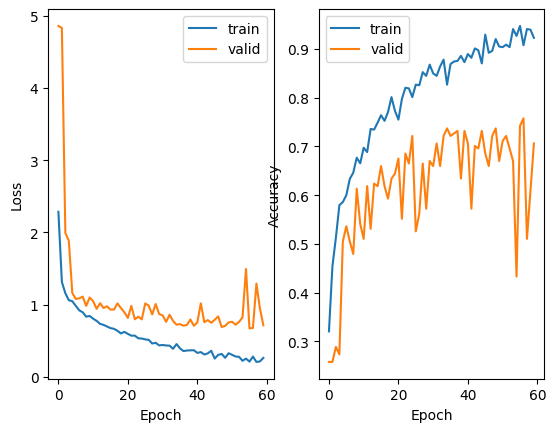

In [ ]:
# Visualization of the learning curves

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'valid'])

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'valid'])


In [ ]:
# Evaluation M1
score = net.evaluate(val_dataset)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7135 - loss: 0.7123
Test loss: 0.7137465476989746
Test accuracy: 0.7061855792999268


The model starts with an input layer that accepts images with three color channels (RGB).
- The first convolutional block consists of a Conv2D layer with 32 filters, batch normalization, ReLU activation, and MaxPooling2D for downsampling.
- The second block includes another Conv2D layer with 64 filters, followed by batch normalization and ReLU activation.
- A dropout layer with a rate of 0.3 is added to prevent overfitting.
- GlobalMaxPooling2D reduces the feature map dimensions.
- A dense (fully connected) layer with a number of units equal to the number of classes, using softmax activation to output a probability distribution over the classes.

The model is compiled using categorical cross-entropy loss, the RMSprop optimizer with a learning rate of 0.001, and accuracy as a performance metric.

Our primary objective is to achieve low loss and high accuracy. The final test loss and test accuracy for this model are 0.714 and 0.706, respectively. However, the accuracy curve displayed in the right graph indicates instability in the accuracy progression.

**Model M4.2**

In [ ]:
# Data augmentation process
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.3)

test_datagen = ImageDataGenerator(rescale=1./255)



train_dataset = train_datagen.flow_from_directory(
    dataset_dir,
    batch_size=32,
    class_mode='categorical',
    subset='training')

val_dataset = train_datagen.flow_from_directory(
    dataset_dir,
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 684 images belonging to 4 classes.
Found 290 images belonging to 4 classes.


This code sets up a data augmentation pipeline and preprocessing steps for image datasets using Keras' ImageDataGenerator class.


1) Data Augmentation for Training:


The **train_datagen** object is initialized with various augmentation parameters:
* *rotation_range* : Random rotation of images within a specified range (in degrees), here set to 20.
* *width_shift_range* and *height_shift_range* : Random horizontal and vertical shifts applied to images, specified as a fraction of the total width or height, both set to 0.2.
* *shear_range* : Random shearing transformations applied to images, set to 0.2.
* *zoom_range* : Random zooming into images, set to 0.2.
* *horizontal_flip* : Random horizontal flipping of images for additional variation.
* *fill_mode* : Strategy for filling in newly created pixels, set to 'nearest' for the nearest-neighbor interpolation method.
* *validation_split* : Fraction of the training data to use for validation, here set to 0.3 (30%).


The data augmentation process generates a wide variety of augmented images from the original training dataset. These variations help the model generalize better to unseen data by exposing it to different perspectives, orientations, and lighting conditions.


2) Preprocessing for Test Data:


The **test_datagen** object is initialized with a single parameter:
* *rescale*: Rescaling factor applied to pixel values to normalize them between 0 and 1.

In [ ]:
# Architecture definition M2
inputs = keras.Input((None,None,3))

x = inputs
x = keras.layers.Conv2D(32, 3, padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)

x = keras.layers.Conv2D(64, 3, padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)

x = keras.layers.Dropout(0.3)(x)
x = keras.layers.GlobalMaxPooling2D()(x)

outputs = keras.layers.Dense(num_classes, activation="softmax")(x)
net = keras.Model(inputs, outputs)

In [ ]:
# Compile the model for training M2
net.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
            metrics=['accuracy'])

In [ ]:
# Model training M2
history = net.fit(train_dataset,
          epochs=60,
          validation_data=val_dataset);

Epoch 1/60


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 787ms/step - accuracy: 0.3219 - loss: 3.4775 - val_accuracy: 0.2793 - val_loss: 4.5812
Epoch 2/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 29s 558ms/step - accuracy: 0.4671 - loss: 1.3946 - val_accuracy: 0.2759 - val_loss: 2.9909
Epoch 3/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 17s 636ms/step - accuracy: 0.4873 - loss: 1.2013 - val_accuracy: 0.2552 - val_loss: 2.6211
Epoch 4/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 20s 585ms/step - accuracy: 0.4574 - loss: 1.2152 - val_accuracy: 0.3034 - val_loss: 1.7255
Epoch 5/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 19s 577ms/step - accuracy: 0.5543 - loss: 1.1203 - val_accuracy: 0.3000 - val_loss: 1.6031
Epoch 6/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 15s 579ms/step - accuracy: 0.5589 - loss: 1.0322 - val_accuracy: 0.3034 - val_loss: 1.5383
Epoch 7/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 15s 490ms/step - accuracy: 0.5894 - loss: 1.0362 - val_accuracy: 0.4276 - val_loss: 1.2220
Epoch 8/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 22s 625ms/step - accuracy: 0.6049 - loss: 0.9890 - val_accuracy: 0.506

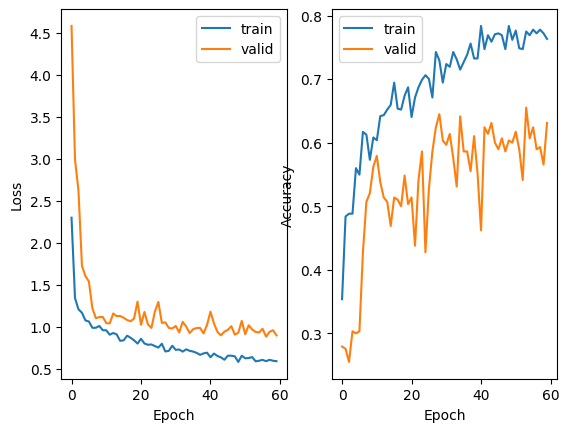

In [ ]:
# Visualization of the learning curves

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'valid'])

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'valid'])


In [ ]:
# Evaluation M2
score = net.evaluate(val_dataset)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 395ms/step - accuracy: 0.6475 - loss: 0.9118
Test loss: 0.9299629926681519
Test accuracy: 0.6206896305084229


Model M4.2, while mirroring Model M4.1 in its structure, introduces data augmentation techniques aimed at enhancing performance. However, despite these efforts, the accuracy experiences a notable decline to 0.621. This indicates that further adjustments are necessary to develop a more effective model.

**Model M4.3**

In [ ]:
# Architecture definition M3
inputs = keras.Input((None,None,3))

x = inputs
x = keras.layers.Conv2D(32, 3, padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.MaxPooling2D(3, strides=1, padding="same")(x)

x = keras.layers.Conv2D(64, 3, padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.MaxPooling2D(3, strides=1, padding="same")(x)

x = keras.layers.Conv2D(128, 3, padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)

x = keras.layers.GlobalMaxPooling2D()(x)

x = keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)

outputs = keras.layers.Dense(num_classes, activation="softmax", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
net = keras.Model(inputs, outputs)

In [ ]:
# Compile the model for training M3
net.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
            metrics=['accuracy'])

In [ ]:
# Model training M3
history = net.fit(train_dataset,
          epochs=60,
          validation_data=val_dataset);

Epoch 1/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 886ms/step - accuracy: 0.2930 - loss: 5.0397 - val_accuracy: 0.2784 - val_loss: 3.3647
Epoch 2/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 341ms/step - accuracy: 0.3678 - loss: 1.6826 - val_accuracy: 0.4124 - val_loss: 2.5257
Epoch 3/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 347ms/step - accuracy: 0.4196 - loss: 1.5494 - val_accuracy: 0.3196 - val_loss: 2.3441
Epoch 4/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 377ms/step - accuracy: 0.4414 - loss: 1.4735 - val_accuracy: 0.3093 - val_loss: 1.9096
Epoch 5/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 354ms/step - accuracy: 0.5438 - loss: 1.3134 - val_accuracy: 0.4175 - val_loss: 1.9151
Epoch 6/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 356ms/step - accuracy: 0.5660 - loss: 1.2729 - val_accuracy: 0.4536 - val_loss: 1.6048
Epoch 7/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 353ms/step - accuracy: 0.4889 - loss: 1.4645 - val_accuracy: 0.3711 - val_loss: 1.5638
Epoch 8/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 347ms/step - accuracy: 0.6165 - loss: 1.2203 - val_accuracy

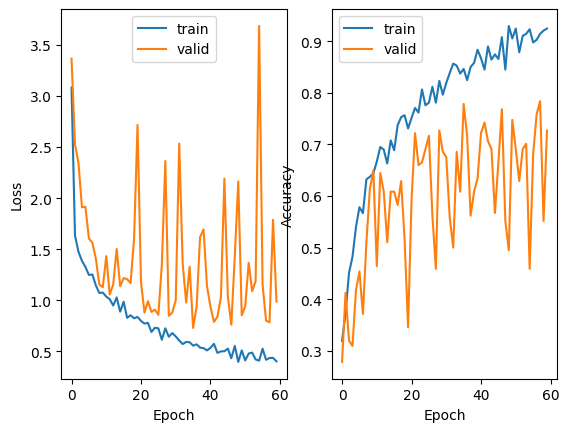

In [ ]:
# Visualization of the learning curves

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'valid'])

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'valid'])


In [ ]:
# Evaluation M3
score = net.evaluate(val_dataset)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.6935 - loss: 1.0712
Test loss: 0.9882728457450867
Test accuracy: 0.7268041372299194


In model M3, several enhancements have been made compared to the previous model (M2). The notable improvements include:


* Additional Convolutional Block: M3 incorporates an additional convolutional block, featuring another Conv2D layer with 128 filters, followed by batch normalization and ReLU activation. This deeper architecture allows for more complex feature extraction, potentially capturing finer details in the data.


* Increased Depth: With the addition of the convolutional block, the model's depth has increased, providing more capacity to learn intricate patterns within the data.


* **Regularization**: L2 regularization has been applied to both convolutional and dense layers in M3. This regularization technique helps prevent overfitting by penalizing large weights, promoting smoother decision boundaries and better generalization performance.


These improvements aim to enhance the model's ability to capture meaningful features from the input data while mitigating overfitting. The integration of regularization also contributes to a more stable and robust training process.


As a result, the accuracy escalates to 0.727. Nevertheless, the subsequent focus is on stabilizing the two plots for further optimization.


**Model M4.4**

In [ ]:
train_dataset = keras.utils.image_dataset_from_directory(dataset_dir,
                                                            batch_size=32,
                                                            label_mode='categorical',
                                                            subset='training',
                                                            validation_split = 0.3,
                                                            shuffle=True,
                                                            seed=1)

val_dataset = keras.utils.image_dataset_from_directory(dataset_dir,
                                                            batch_size=32,
                                                            label_mode='categorical',
                                                            subset='validation',
                                                            validation_split = 0.3,
                                                            shuffle=True,
                                                            seed=1)


Found 974 files belonging to 4 classes.
Using 682 files for training.
Found 974 files belonging to 4 classes.
Using 292 files for validation.


In [ ]:
# Architecture definition M4
inputs = keras.Input((None,None,3))

x = inputs
x = keras.layers.Conv2D(32, 3, padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.MaxPooling2D(3, strides=1, padding="same")(x)

x = keras.layers.Conv2D(64, 3, padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.MaxPooling2D(3, strides=1, padding="same")(x)

x = keras.layers.Conv2D(128, 3, padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)

x = keras.layers.GlobalMaxPooling2D()(x)

x = keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)

outputs = keras.layers.Dense(num_classes, activation="softmax", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
net = keras.Model(inputs, outputs)

In [ ]:
# Compile the model for training M4
net.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.Adam(learning_rate=0.001),
            metrics=['accuracy'])

In [ ]:
# Model training M4
history = net.fit(train_dataset,
          epochs=60,
          validation_data=val_dataset);

Epoch 1/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.2911 - loss: 3.3928 - val_accuracy: 0.2432 - val_loss: 3.5333
Epoch 2/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 377ms/step - accuracy: 0.4568 - loss: 1.4184 - val_accuracy: 0.2295 - val_loss: 2.8590
Epoch 3/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 380ms/step - accuracy: 0.5234 - loss: 1.2819 - val_accuracy: 0.3664 - val_loss: 1.5598
Epoch 4/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 387ms/step - accuracy: 0.5993 - loss: 1.2285 - val_accuracy: 0.4760 - val_loss: 1.4388
Epoch 5/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 395ms/step - accuracy: 0.6606 - loss: 1.1198 - val_accuracy: 0.5411 - val_loss: 1.3459
Epoch 6/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 369ms/step - accuracy: 0.6915 - loss: 1.0164 - val_accuracy: 0.6096 - val_loss: 1.1917
Epoch 7/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 370ms/step - accuracy: 0.6505 - loss: 1.0510 - val_accuracy: 0.5856 - val_loss: 1.2283
Epoch 8/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 383ms/step - accuracy: 0.7460 - loss: 0.8933 - val_accuracy: 0

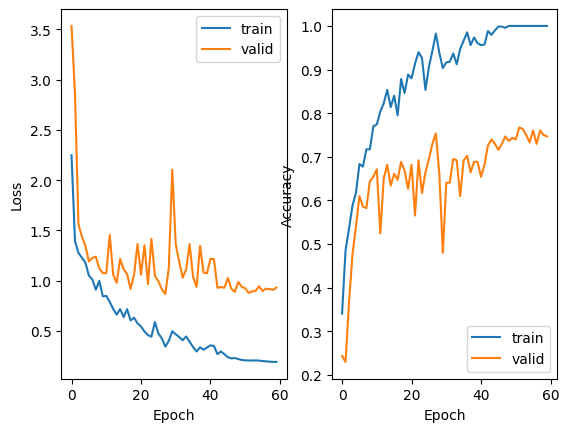

In [ ]:
# Visualization of the learning curves

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'valid'])

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'valid'])


In [ ]:
# Evaluation M4
score = net.evaluate(val_dataset)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.7496 - loss: 0.9498
Test loss: 0.9335823655128479
Test accuracy: 0.7465753555297852


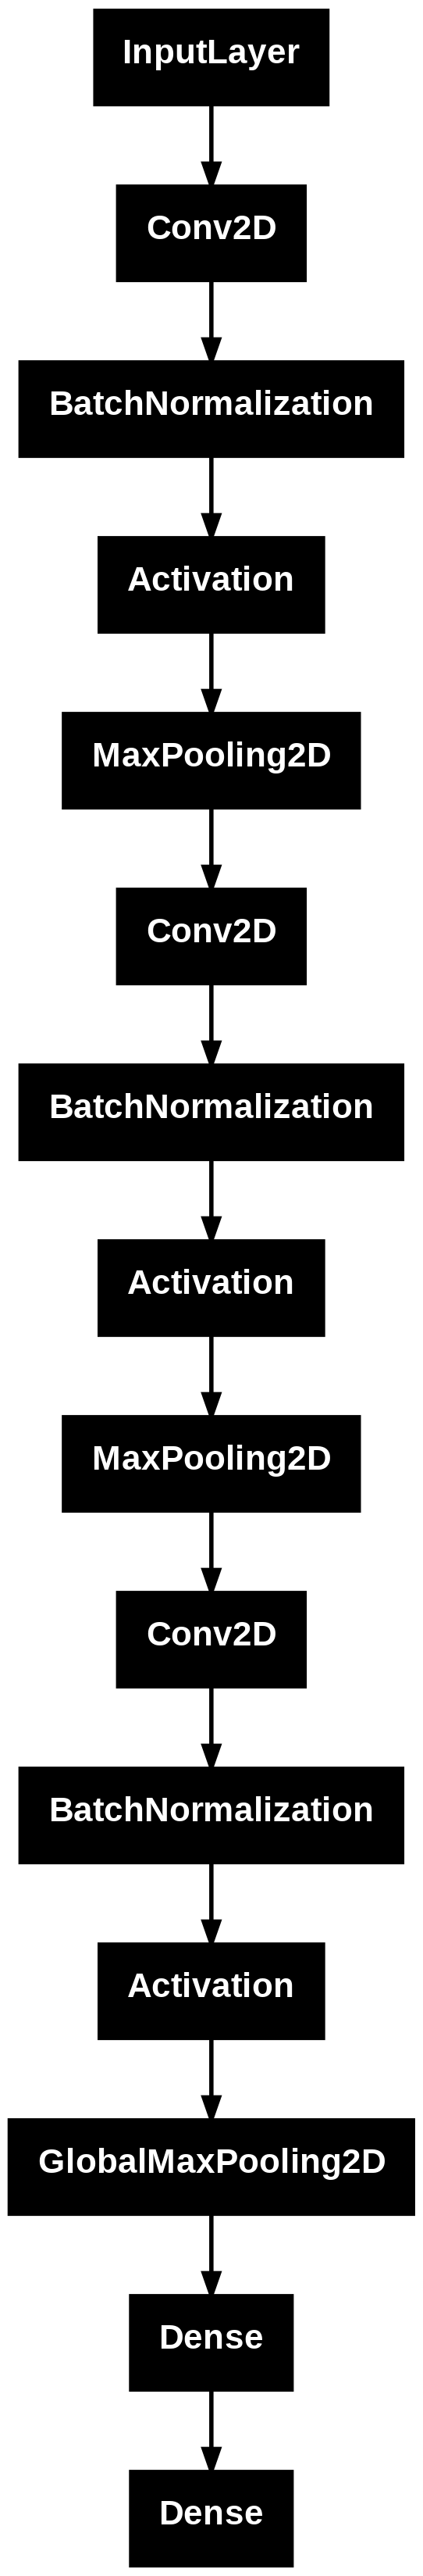

In [ ]:
keras.utils.plot_model(net)

The ultimate iteration, M4.4, retains the architecture of M4.3, with the exception of employing the Adam optimizer instead of RMSProp during compilation. This adjustment yields an enhanced accuracy of 0.747 and fosters more stable curves for both the loss and accuracy functions.


The adoption of the **Adam optimizer** has likely contributed to the performance enhancement due to its adaptive learning rate mechanism. Adam dynamically adjusts the learning rates for each parameter, which can lead to faster convergence and improved generalization.


## **Predictions on the test data**

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step


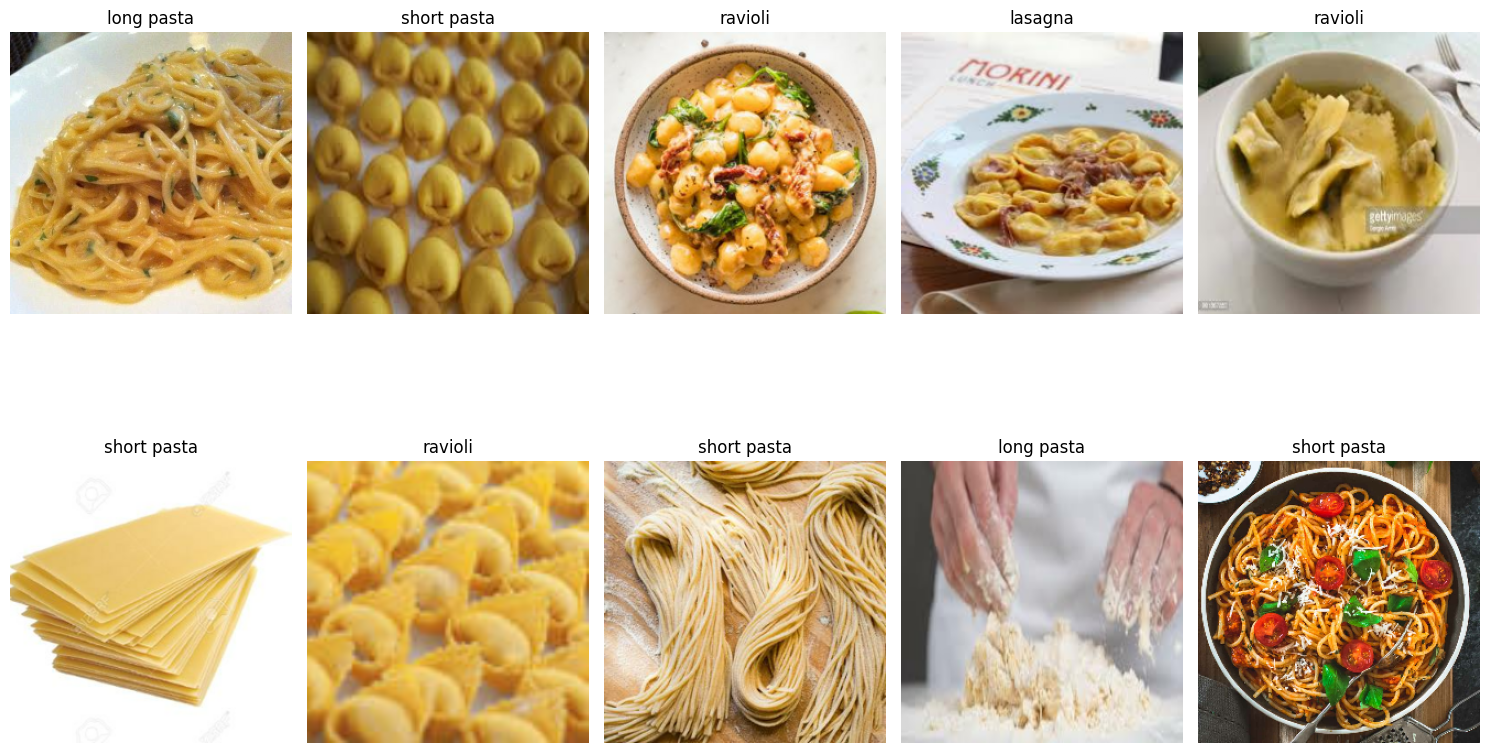

In [ ]:
predictions = net.predict(val_dataset)
predicted_labels = np.argmax(predictions, axis=1)

class_names = ['lasagna', 'long pasta', 'ravioli', 'short pasta']
predicted_labels_names = [class_names[idx] for idx in predicted_labels]


sample_images, _ = next(iter(val_dataset))
sample_images = sample_images / 255.0


plt.figure(figsize=(15, 10))
for i in range(10):
   plt.subplot(2, 5, i + 1)
   plt.imshow(sample_images[i])
   plt.title(predicted_labels_names[i])
   plt.axis('off')
plt.tight_layout()
plt.show()

The code makes predictions on the validation dataset using the trained model. It converts the predicted probabilities to class labels by taking the index with the highest probability for each prediction. These indices are then mapped to corresponding class names: 'lasagna', 'long pasta', 'ravioli', and 'short pasta'.
A batch of images is fetched from the validation set and normalized by scaling the pixel values to the range [0, 1]. The code displays the first 10 images from the batch, with its predicted class name.


## **Confusion Matrix**

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step


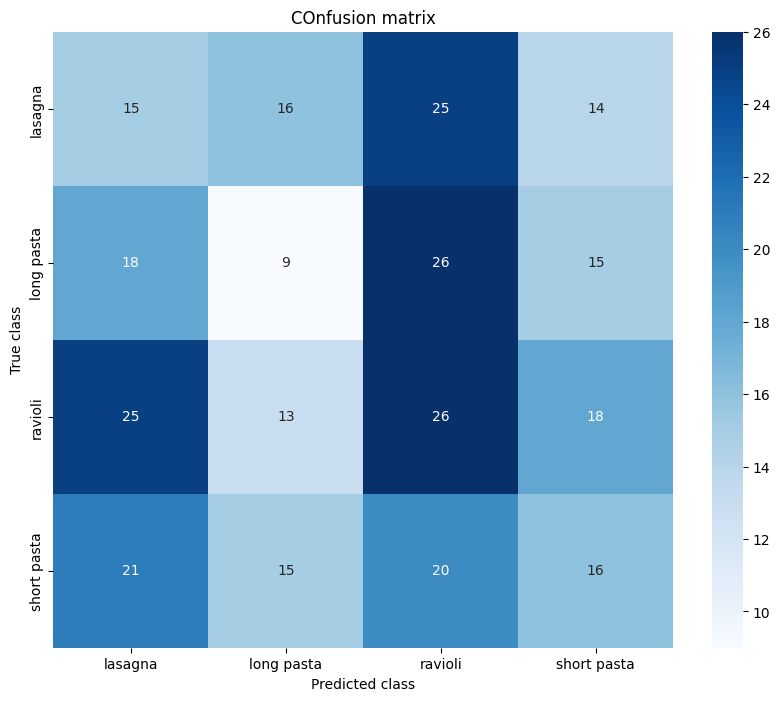

In [ ]:
yc_pred = net.predict(val_dataset)
y_pred = np.argmax(yc_pred, axis=1)

yc_test = np.concatenate([y for _, y in val_dataset], axis=0)
y_test = np.argmax(yc_test, axis=1)


conf_matrix = confusion_matrix(y_test, y_pred)
class_names=["lasagna", "long pasta", "ravioli", "short pasta"]
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('COnfusion matrix')
plt.show()

In [ ]:
# Classification report
print('Classification report:')
print(classification_report(y_test, y_pred))

Classification report:
              precision    recall  f1-score   support

           0       0.22      0.24      0.23        70
           1       0.26      0.21      0.23        68
           2       0.30      0.35      0.32        82
           3       0.30      0.26      0.28        72

    accuracy                           0.27       292
   macro avg       0.27      0.27      0.27       292
weighted avg       0.27      0.27      0.27       292



A confusion matrix is computed to compare the true and predicted labels. This matrix is then visualized using a heatmap. The heatmap displays the counts of correct and incorrect predictions for each class, with class names labeled on both axes.


## **Saving the model**



In [ ]:
net.save('M4.4.keras')

# net = None
# net = keras.models.load_model('mymodel_101.keras')